Reading external data and plotting

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/Users/pasanggelzeen/dev/data-science/freecodecamp-data-practise/dataset/btc-market-price.csv", header=None)
#header = None parameter tells the pandas not to assume the first row of data as the columns.

What does header=None mean in pd.read_csv()?

•By default, pandas assumes the first row of the CSV file is the header row containing column names.

•Setting header=None tells pandas that there is no header row in the CSV.

•Pandas will then auto-assign column numbers as headers: 0, 1, 2, ...

•Useful when your CSV file only contains data without any column names.


In [5]:
df.head()

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


The columns we are using has two columns. They are mostly related to the timestamp and the price. But they dont have their column name specified except their respective index.

In [6]:
df.columns = ["Timestamp", "Price"]
#This assigns the names to the columns

In [7]:
df.shape

(365, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  365 non-null    object 
 1   Price      365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [9]:
df.head()

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [10]:
df.tail()

,Timestamp,Price
360,2018-03-28 00:00:00,7960.380000
361,2018-03-29 00:00:00,7172.280000
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000
364,2018-04-01 00:00:00,6794.105000


In [11]:
df.dtypes

Timestamp     object
Price        float64
dtype: object

In [12]:
pd.to_datetime(df["Timestamp"]).head()


0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: Timestamp, dtype: datetime64[ns]

In [13]:
df

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937
...,...,...
360,2018-03-28 00:00:00,7960.380000
361,2018-03-29 00:00:00,7172.280000
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000


In [14]:
df.dtypes

Timestamp     object
Price        float64
dtype: object

In [15]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [16]:
df

,Timestamp,Price
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363
3,2017-04-05,1133.079314
4,2017-04-06,1196.307937
...,...,...
360,2018-03-28,7960.380000
361,2018-03-29,7172.280000
362,2018-03-30,6882.531667
363,2018-03-31,6935.480000


In [17]:
df.dtypes

Timestamp    datetime64[ns]
Price               float64
dtype: object

In [18]:
df.head()

,Timestamp,Price
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363
3,2017-04-05,1133.079314
4,2017-04-06,1196.307937


In [19]:
df.set_index("Timestamp", inplace = True)
#Setting the date as index 

In [20]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [21]:
df.loc["2017-09-18"]
#Locating the rows with the given index

Price    4093.316667
Name: 2017-09-18 00:00:00, dtype: float64

Putting all the things together

In [22]:
df = pd.read_csv("/Users/pasanggelzeen/dev/data-science/freecodecamp-data-practise/dataset/btc-market-price.csv", header=None)
df.columns = ["Timestamp" , "Price"]
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df.set_index("Timestamp",inplace=True)

In [23]:
df

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937
...,...
2018-03-28,7960.380000
2018-03-29,7172.280000
2018-03-30,6882.531667


There is a better way for handling all these repetitive things in pandas. The read_csv function is extremely powerful that means we can specify lot of parameters here.

In [24]:
df = pd.read_csv(
    "/Users/pasanggelzeen/dev/data-science/freecodecamp-data-practise/dataset/btc-market-price.csv",
    header = None, 
    names = ["Timestamp", "Price"],
    index_col = 0,
    parse_dates = True
    )


In [25]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [26]:
df.loc["2017-09-18"]

Price    4093.316667
Name: 2017-09-18 00:00:00, dtype: float64

Plotting basics

Pandas integrates with matplotlib and creating a plot is simple as:


<Axes: xlabel='Timestamp'>

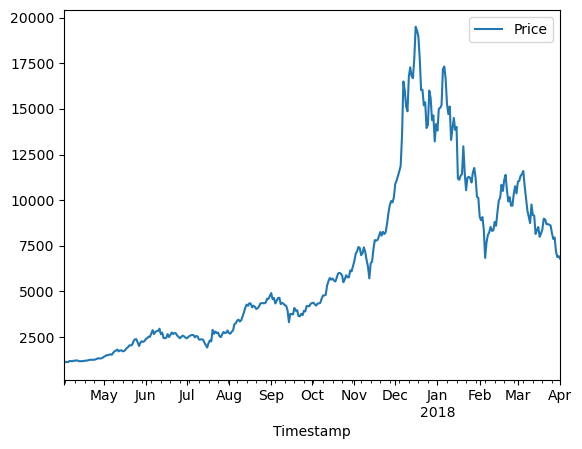

In [ ]:
df.plot()

#Behind the bars it is using matplotlib.pyplot interface

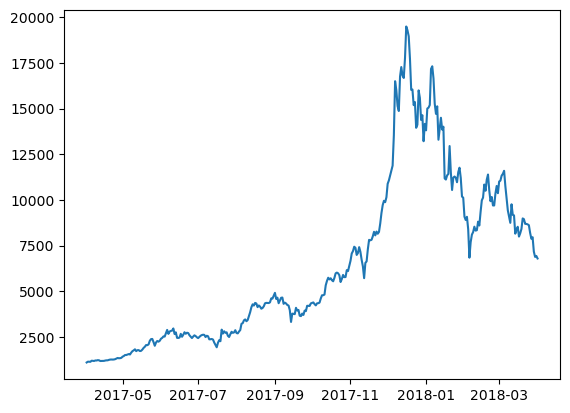

In [28]:
plt.plot(df.index, df["Price"])

plt.plot() accepts many parameters , but the first two ones are the most importants which is x and y.

In [29]:
x = np.arange(-10,11)

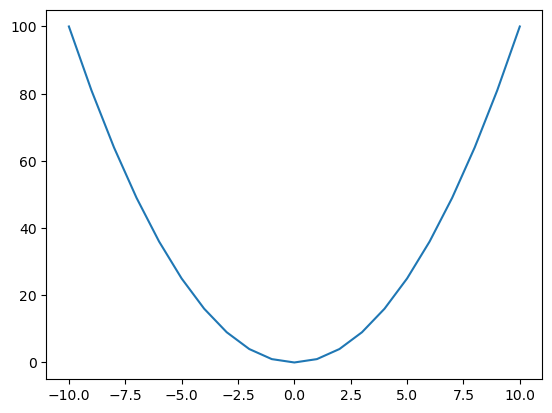

In [30]:
plt.plot(x , x ** 2)

We are using matplotlin's global API , which is horrible but the most popular to use.

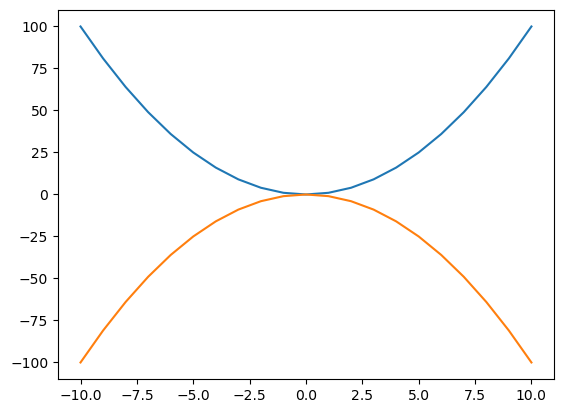

In [31]:
plt.plot(x , x **2)
plt.plot(x , -1 * (x **2))

Each plt function alters the global state. If you want to set settings for your plot we can use plt.figure function. Others like plt.title keep altering the global state.

A more challenging parsing

For demonstrating the plotting of two  columns together we will try to add the ether price data to the bitcoin dataframe we created earlier. The data we are going to use is the eth-price.csv

In [35]:
eth = pd.read_csv("/Users/pasanggelzeen/dev/data-science/freecodecamp-data-practise/dataset/eth-price.csv")

In [36]:
eth.head()

,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


In the context of a DataFrame in pandas (Python), the term “parse” generally refers to the process of converting raw data (like strings) into structured or meaningful data types that pandas can work with more effectively.

In [37]:
eth = pd.read_csv("/Users/pasanggelzeen/dev/data-science/freecodecamp-data-practise/dataset/eth-price.csv", parse_dates=True)

#parse_dates=True tells pandas to convert any datas that look like dates to proper datetime objects

In [38]:
print(eth.dtypes)

Date(UTC)         object
UnixTimeStamp      int64
Value            float64
dtype: object


In [39]:
eth.head()

,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


The problem is that the parse_dates didnt work. So we will need to solve the problem of date parsing at first.

Importance of Date Parsing in Data Science

•	Accurate datetime recognition: Converts string-formatted dates into usable datetime objects for analysis.

•	Enables time-based filtering: Helps extract data for specific date ranges, like “last month” or “between two dates”.
	
•	Time series analysis: Essential for working with stock prices, weather data, flight delays, sales trends, etc.
	
•	Chronological sorting: Allows proper ordering of data in time, which is crucial for trend analysis.
	
•	Resampling and aggregation: Enables grouping data by day, week, month, or year (e.g., total sales per month).
	
•	Duration and difference calculations: Lets you compute time intervals like customer lifetime, session durations, or days between events.
	
•	Forecasting and modeling: Models like ARIMA, Prophet, and LSTM require datetime-aware inputs.
	
•	Data cleaning and integrity: Identifies and corrects invalid or malformed date entries.
	
•	Feature engineering: Extracts useful features like day_of_week, is_weekend, month, or season from dates.
	
•	Handling time zones and localization: Enables conversion across time zones for globally collected data.
    

In [40]:
pd.to_datetime(eth["UnixTimeStamp"]).head()

0   1970-01-01 00:00:01.491091200
1   1970-01-01 00:00:01.491177600
2   1970-01-01 00:00:01.491264000
3   1970-01-01 00:00:01.491350400
4   1970-01-01 00:00:01.491436800
Name: UnixTimeStamp, dtype: datetime64[ns]

The problem is the precision of unix timestamps. To match both columns we will need to used the same index . The df containing bitcoin prices is perday.

In [41]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [42]:
pd.to_datetime(eth["Date(UTC)"]).head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: Date(UTC), dtype: datetime64[ns]

The problem here was that parse_time = True only works for the index columns. Since index column are not specified for the given eth dataframe. We will need to specify it by passing the column name.

In [45]:
pd.read_csv("/Users/pasanggelzeen/dev/data-science/freecodecamp-data-practise/dataset/eth-price.csv", parse_dates=[0]).head()

,Date(UTC),UnixTimeStamp,Value
0,2017-04-02,1491091200,48.55
1,2017-04-03,1491177600,44.13
2,2017-04-04,1491264000,44.43
3,2017-04-05,1491350400,44.90
4,2017-04-06,1491436800,43.23


Putting everything together

In [46]:
eth = pd.read_csv("/Users/pasanggelzeen/dev/data-science/freecodecamp-data-practise/dataset/eth-price.csv", parse_dates=True, index_col=0)
print(eth.info())
eth.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2017-04-02 to 2018-04-01
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UnixTimeStamp  362 non-null    int64  
 1   Value          362 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.5 KB
None


,UnixTimeStamp,Value
Date(UTC),,
2017-04-02,1491091200,48.55
2017-04-03,1491177600,44.13
2017-04-04,1491264000,44.43
2017-04-05,1491350400,44.90
2017-04-06,1491436800,43.23



A Unix timestamp is simply the number of seconds that have passed since a fixed starting point — which is called the Unix Epoch, set at:

January 1, 1970, 00:00:00 UTC

In [48]:
prices = pd.DataFrame(index = df.index)

#Creating a new dataframe with the same index as the previous dataframe with no columns initially.

In [49]:
prices.head()

""
Timestamp
2017-04-02
2017-04-03
2017-04-04
2017-04-05
2017-04-06


In [52]:
prices["Bitcoin"] = df["Price"]
prices["Ether"] = eth["Value"]

# Creating the column names Bitcoin and Ether and assigning the prices of the Bitcoin and Ether to respective columns

In [53]:
prices.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


<Axes: xlabel='Timestamp'>

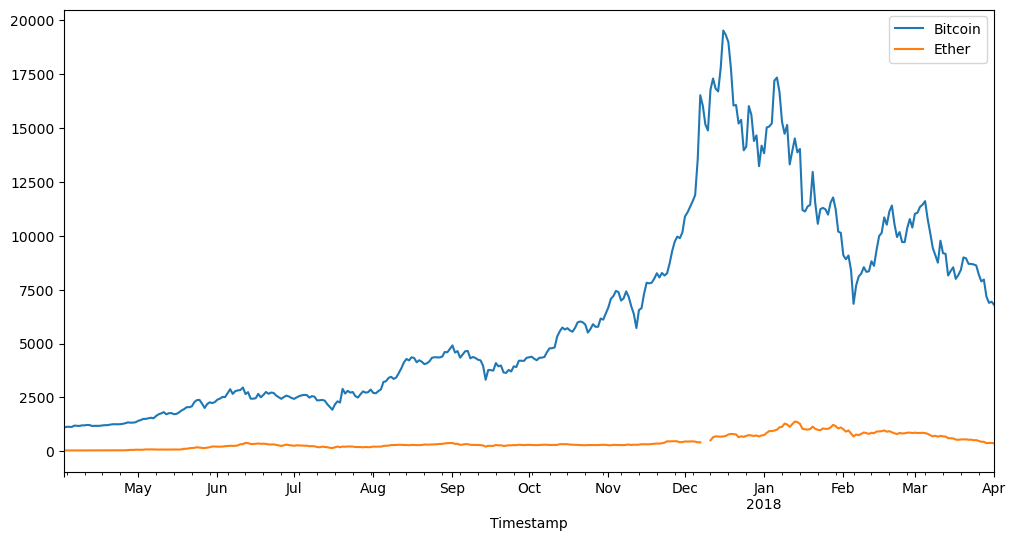

In [55]:
prices.plot(figsize = (12,6))

#Price each numeric column of the prices against the index
#width =12 inches, height = 6 inches

<Axes: xlabel='Timestamp'>

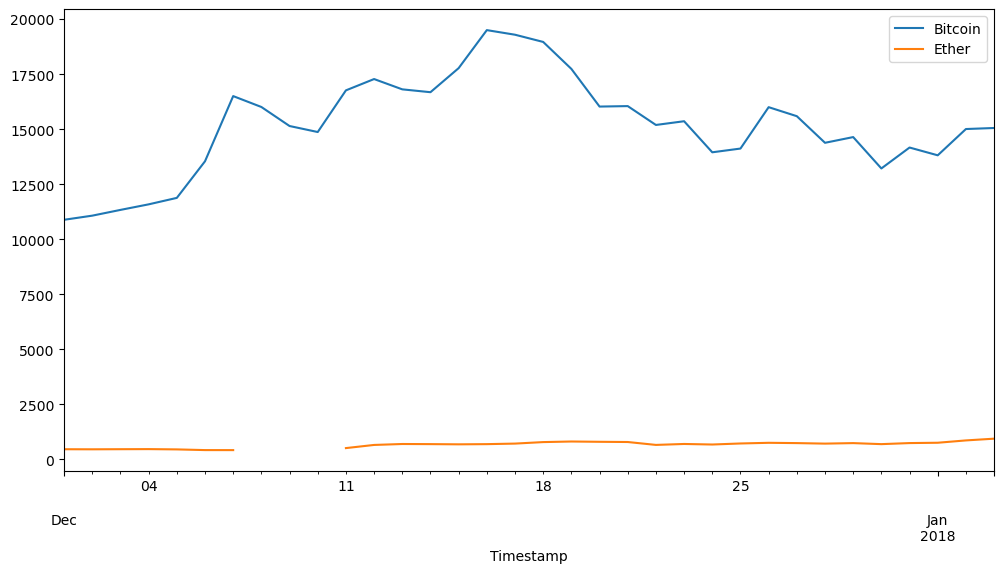

In [58]:
prices.loc["2017-12-1" : "2018-01-03"].plot(figsize=(12,6))

#The main reason for using the above code it to get detail about the missing gap in the figure.


This is the missing data that we will have to handle because this missing data can be a great problem later on